# Model Training

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [32]:
# Load cleaned dataset from Module 3
df = pd.read_csv('process_data/fs_2_analytic_table.csv')
df.shape
df.head()

,DP05_0001E,DP04_0002E,DP03_0005E,DP03_0094E,DP03_0006E,DP02_0097E,DP03_0090E,DP05_0074E,DP02_0127E,DP03_0112E,...,DP02_0128E,ESTAB_2012,ESTAB_2014,ESTAB_2016,delta_2016_2014,delta_2016_2012,"add_['DP02_0065E', 'DP02_0064E']","add_['DP03_0028E', 'DP03_0027E']","add_['DP04_0109E', 'DP04_0140E']","add_['DP05_0059E', 'DP05_0062E']"
0,-239,-18,115,283.000,11,334.000,-10140.000,10,34.000,80,...,303.000,35,36,33,-3,-2,366.000,-213,164,-122
1,1126,234,-99,14.000,-17,-182.000,-2793.000,19,-183.000,-65,...,6.000,63,63,58,-5,-5,260.000,478,123,1239
2,-7,16,-9,-3105.000,-13,14.000,-7039.000,-2,13.000,-24,...,-391.000,8,9,10,1,2,-221.000,-147,36,-15
3,181,106,-26,1462.000,0,-5.000,-1579.000,0,40.000,2,...,108.000,15,17,18,1,3,-215.000,-12,27,239
4,52,32,23,4278.000,3,-3.000,13274.000,0,-5.000,15,...,-17.000,5,4,5,1,0,17.000,52,-4,56


<br id="split">
# 1. Divide training and splitting data_set

- Get top 20 correlated features as X
- Get delta_2016_2014 as y

<br>


In [4]:
correlations = df.corr()
#top_50 correlated variables for 2016_2014
top_20_variable = correlations.sort_values('delta_2016_2014',ascending=False)[5:25].index

In [9]:
#code below is just to double check these are the 20 features we selected
# final_features = ['DP02_0058E',
#  'DP02_0111E',
#  'DP02_0014E',
#  'DP02_0001E',
#  'DP02_0094E',
#  'DP03_0004E',
#  'DP03_0051E',
#  'DP03_0096E',
#  'DP04_0124E',
#  'DP04_0002E',
#  'DP05_0001E',
#  'DP05_0025E',
#  'DP05_0071E',
#  'DP05_0062E',
#  "add_['DP02_0065E', 'DP02_0064E']",
#  'DP02_0020E',
#  'DP02_0098E',
# "add_['DP03_0028E', 'DP03_0027E']",
#  "add_['DP04_0109E', 'DP04_0140E']",
# "add_['DP05_0059E', 'DP05_0062E']" 
#  ]

# set(final_features) == set(top_20_variable)

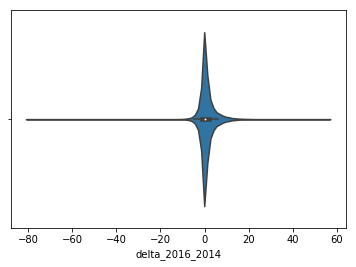

In [5]:
sns.violinplot(df.delta_2016_2014)

In [6]:
outliner_index = df[(df.delta_2016_2014<-60)|(df.delta_2016_2014>40)].index

In [7]:
df = df.drop(outliner_index)
df.shape

(21495, 161)

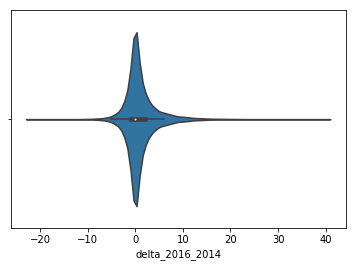

In [8]:
sns.violinplot(df.delta_2016_2014)

In [9]:
X=df[top_20_variable]
y=df.delta_2016_2014
print(X.shape,y.shape)

(21495, 20) (21495,)


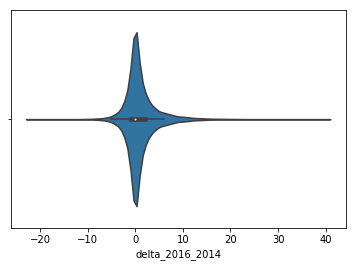

In [10]:
sns.violinplot(y)

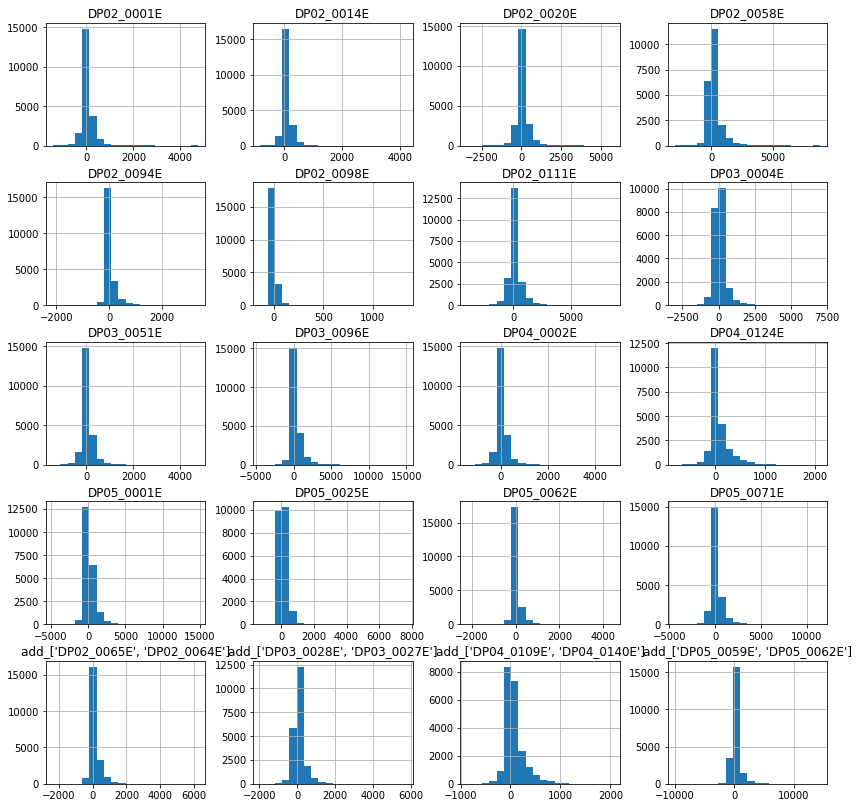

In [11]:
X.hist(bins=20,figsize=(14,14))
plt.show()

## splitting training and test set


In [12]:
from sklearn.model_selection import train_test_split
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=421)
print( len(X_train), len(X_test), len(y_train), len(y_test) )

17196 4299 17196 4299


<br id="pipelines">
# 2. Build model pipelines


<br>
First, let's show the summary statistics from our training data.

In [13]:
X_train.describe()

,DP02_0058E,"add_['DP02_0065E', 'DP02_0064E']",DP03_0096E,DP05_0001E,"add_['DP03_0028E', 'DP03_0027E']",DP04_0124E,"add_['DP04_0109E', 'DP04_0140E']",DP02_0001E,DP03_0051E,DP04_0002E,DP05_0025E,DP03_0004E,DP05_0071E,DP02_0111E,"add_['DP05_0059E', 'DP05_0062E']",DP02_0014E,DP05_0062E,DP02_0094E,DP02_0020E,DP02_0098E
count,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000,17196.000
mean,212.637,134.561,288.434,224.900,90.790,74.520,76.125,44.392,44.392,44.392,110.426,66.197,110.413,139.408,202.234,71.578,54.812,52.927,71.612,8.316
std,535.097,318.982,757.111,759.511,320.185,193.967,195.957,237.554,237.554,237.554,214.739,422.066,637.916,604.747,846.124,143.175,248.610,204.278,376.311,29.755
min,-1963.000,-2330.000,-4422.000,-4391.000,-1942.000,-790.000,-859.000,-1415.000,-1415.000,-1415.000,-1296.000,-3015.000,-4414.000,-3755.000,-9954.000,-814.000,-2196.000,-2125.000,-3377.000,-136.000
25%,-48.000,-15.000,-72.000,-104.000,-50.000,-16.000,-18.000,-56.000,-56.000,-56.000,-5.000,-108.000,-147.250,-120.000,-116.000,-6.000,-9.000,-10.000,-84.000,0.000
50%,63.000,37.000,83.000,52.000,20.000,20.000,22.000,10.000,10.000,10.000,50.000,8.000,18.000,34.000,42.000,32.000,0.000,3.000,12.000,0.000
75%,317.000,191.000,428.000,361.250,162.000,119.000,127.000,107.000,107.000,107.000,177.000,166.000,257.250,292.000,336.000,119.000,52.000,53.000,163.000,1.000
max,8823.000,6223.000,14836.000,14739.000,5697.000,2092.000,2043.000,4745.000,4745.000,4745.000,7610.000,6986.000,11389.000,8608.000,14403.000,4164.000,4428.000,3363.000,5733.000,1328.000


In [14]:
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

In [15]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))
    
}


In [16]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


<br id="hyperparameters">
# 3. Declare hyperparameters to tune



<br>


In [17]:
# Lasso hyperparameters
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }
# Ridge hyperparameters
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  }
# Elastic Net hyperparameters
enet_hyperparameters = { 'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                       
                        'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9] }
# Random forest hyperparameters
rf_hyperparameters ={'randomforestregressor__n_estimators': [100, 200],
                    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]}
# Boosted tree hyperparameters
gb_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                       'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                       'gradientboostingregressor__max_depth': [1, 3, 5]}


In [18]:
# Create hyperparameters dictionary
hyperparameters = {'lasso':lasso_hyperparameters,
                  'ridge': ridge_hyperparameters,
                  'enet':enet_hyperparameters,
                  'rf':rf_hyperparameters,
                  'gb':gb_hyperparameters}

In [19]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<br id="fit-tune">
# 4. Fit and tune models with cross-validation



<br>


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV (pipelines[name],hyperparameters[name],cv=10, n_jobs=-1)
    
    
    # Fit model on X_train, y_train
#     model.fit(X_train,y_train)

    
    # Store model in fitted_models[name] 
    fitted_models[name] = model.fit(X_train,y_train)

    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [22]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [23]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [24]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.152024121953
ridge 0.151805817504
enet 0.152043463757
rf 0.165803070968
gb 0.169364574765


In [25]:
from sklearn.metrics import r2_score

In [26]:
for key,value in fitted_models.items():
    predict=value.predict(X_test)
    r2=r2_score(y_test, predict )
    print(key +'\n'+'---------')
    print('R2 score is : {}'.format(r2))

lasso
---------
R2 score is : 0.15148908656074433
ridge
---------
R2 score is : 0.15191252170449476
enet
---------
R2 score is : 0.15168479283648806
rf
---------
R2 score is : 0.16762126715277836
gb
---------
R2 score is : 0.17346253527372024


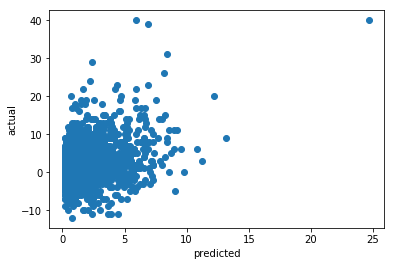

In [27]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [28]:
import pickle

In [29]:
with open('trained_model\linear_model_1.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)

** So far, all the regressor does not do a good job at all. It sucks especially**
<br>
- it cannot predict a negative value. This could be as a result of lack of inversely correlated features.
- also, the y distribution actually has clearly 4 popultions if we look at change in the ratio of restaurants. see the plot below. Maybe  I need to look for feataures with higher correlations to these small populations. 
<br>

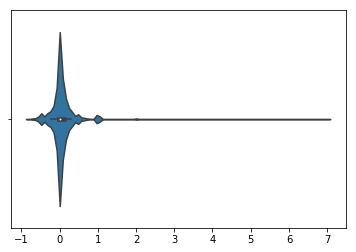

In [33]:
sns.violinplot(df.delta_2016_2014/df.ESTAB_2014)

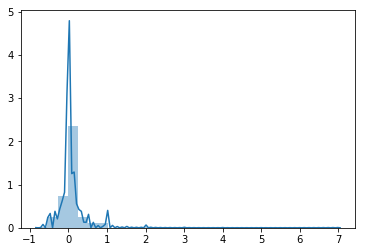

In [36]:
sns.distplot(df.delta_2016_2014/df.ESTAB_2014,bins=30)